In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/wvs/wave7.csv")
df.head()

C:\Users\Carsten\AppData\Local\Temp\ipykernel_23340\977383760.py:1: DtypeWarning: Columns (349,351) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wvs/wave7.csv")


,Unnamed: 0,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,...,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party,Economy ISO3,Economy Name,Year,WPFI
0,0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
1,1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
2,2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79
3,3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,NaN,NaN,NaN,NaN,NaN,NaN,AND,Andorra,2018,77.79
4,4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,AND,Andorra,2018,77.79


## Interviewers observations analysis
There is a section of the Questionare, which is about the observations of the interviewer.
The from the master questionare we can get the following information:
| code | information |
|---|---|
| E| Respondents interest|
| E.1 | Respondents literacy|
| G | Size of the town where the interview was conducted|
| G.1| Settlement name |
| H| Code settlement type |
| H.1 | settlement type |
| J| Date of the interview|
| K | Time of the interview |
| N | Iso 3166-2 code of the region |
| O | Coordinates |

This notebooks takes a closer look at several aspects of this part of the data:
- Data quality
- Rudimentary eda of this data
- In what ways we can take advantage of this data in regards to the research question

## Quick overview: What of this can we actually use?
- Use the respondents interest to scale the trust index
- Controll for the size of the town and the type of the settelment and the time of the interview
- Date of the interview for a more accurate time series of the trust index

### Data quality
- Looking at missing values
- How informative are these values?

### Respondents interest

<Axes: xlabel='E_RESPINT'>

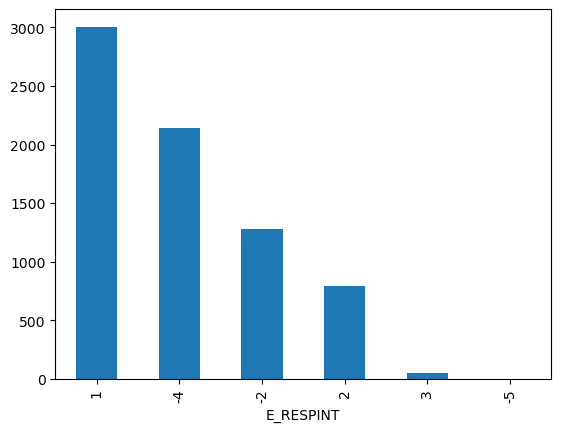

In [19]:
df.E_RESPINT.value_counts().plot(kind="bar")

- -4 occurs a lot. I think it was just skipped
- A lot of respondents were interested and only a small portion was not interested

In [26]:
print("In total %i out of %i were marked as interested" % ((df.E_RESPINT == 1).sum(), len(df)))

In total 3004 out of 7286 were marked as interested


#### Respondents literacy

<Axes: xlabel='E1_LITERACY'>

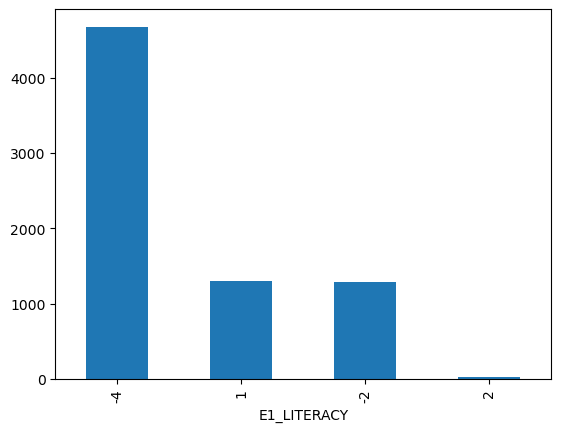

In [20]:
df.E1_LITERACY.value_counts().plot(kind="bar")

- A lot of missing values. Probably because this section was skipped
- But if a person was i literate, this might be a strong singal

In [25]:
print("In total %i out of %i illiterate" % ((df.E1_LITERACY == 2).sum(), len(df)))

In total 26 out of 7286 illiterate


#### Size of the town

<Axes: xlabel='G_TOWNSIZE'>

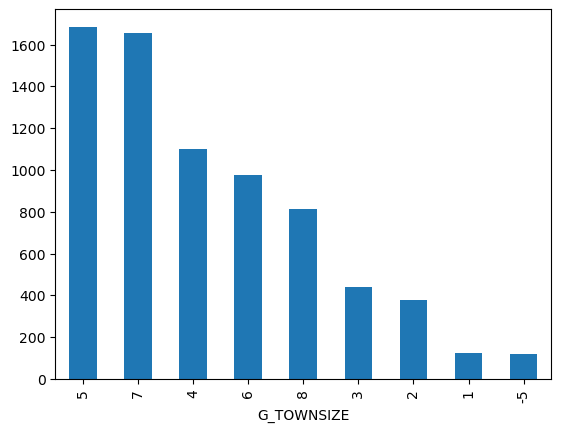

In [30]:
df.G_TOWNSIZE.value_counts().plot(kind="bar")

- This might be estimated by the interviewer and not hugely representative
- What we could instead do is match the data with the iso-3166-2 codes

### Type of region
This might be very interesting

<Axes: xlabel='H_SETTLEMENT'>

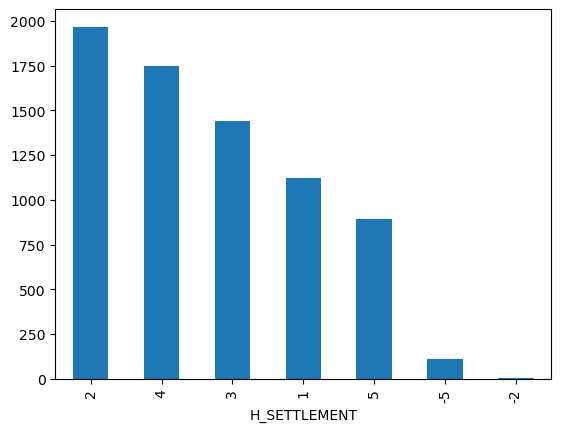

In [28]:
df.H_SETTLEMENT.value_counts().plot(kind="bar")

- We have a lot of data here!
- Most of the interviews were held in the regions center

### Settlement type

<Axes: xlabel='H_URBRURAL'>

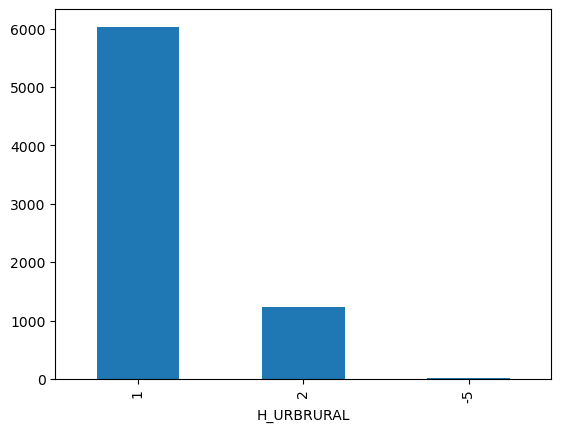

In [32]:
df.H_URBRURAL.value_counts().plot(kind="bar")

- Also an interesting variable, that can be used as a dummy

#### Date of the interview

In [48]:
print("%f of the dates are NA" % ( (df.J_INTDATE == -5).sum()/len(df)))

0.073154 of the dates are NA


- We can use this for a more accurate time

#### Time of the interview

<Axes: ylabel='Frequency'>

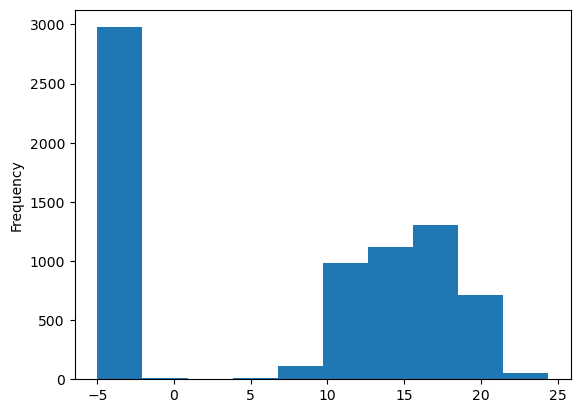

In [51]:
df.K_TIME_END.plot(kind="hist")

- Most of the interviews conducted in the afternoon

In [53]:
(df.N_REGION_ISO < 0).sum()

np.int64(19)

- Almost no NA values in the region code!!!
- This is perhaps the most interesting part of this analysis
  -  Could make for nice visualizations showing the coverage of the surveys conducted